In [1]:
import requests

import altair as alt
import pandas as pd

alt.renderers.enable('svg')

RendererRegistry.enable('svg')

Download treatment duration data
Sample data is in `behandelduur-distribution-20200425.json



In [13]:
treatment_duration = requests.get("https://www.stichting-nice.nl/covid-19/public/behandelduur-distribution/").json()
# treatment_duration:
#
# [0]: levend_nog_opgenomen_ziekenhuis
# [1]: nog_opgenomen_ic
# [2]: levend_ziekenhuis_verlaten
# [3]: overleden

zkh_duration = requests.get("https://www.stichting-nice.nl/covid-19/public/zkh/behandelduur-distribution/").json()
# zkh_duration:
#
# [0]: levend_nog_opgenomen_ziekenhuis
# [1]: levend_ziekenhuis_verlaten
# [2]: overleden

def parse_tuples(tpls, name: str) -> pd.DataFrame:
    # Push [0,0] to front of data so it starts at 0
    tpls[-1] = ((0,0))
    return pd.DataFrame(tpls, columns=['days', name]).set_index('days')

In [15]:
icu_treatment_duration_df = parse_tuples(treatment_duration[0], 'levend_nog_opgenomen_ziekenhuis')\
    .join(parse_tuples(treatment_duration[1], 'nog_opgenomen_ic'), how='outer')\
    .join(parse_tuples(treatment_duration[2], 'levend_ziekenhuis_verlaten'), how='outer')\
    .join(parse_tuples(treatment_duration[3], 'overleden'), how='outer')\
    .fillna(0)
    # Fill all the 0's after joining because it may lengthen the data

zkh_duration_df = parse_tuples(zkh_duration[0], 'levend_nog_opgenomen_ziekenhuis')\
    .join(parse_tuples(zkh_duration[1], 'levend_ziekenhuis_verlaten'), how='outer')\
    .join(parse_tuples(zkh_duration[2], 'overleden'), how='outer')\
    .fillna(0)
    # Fill all the 0's after joining because it may lengthen the data



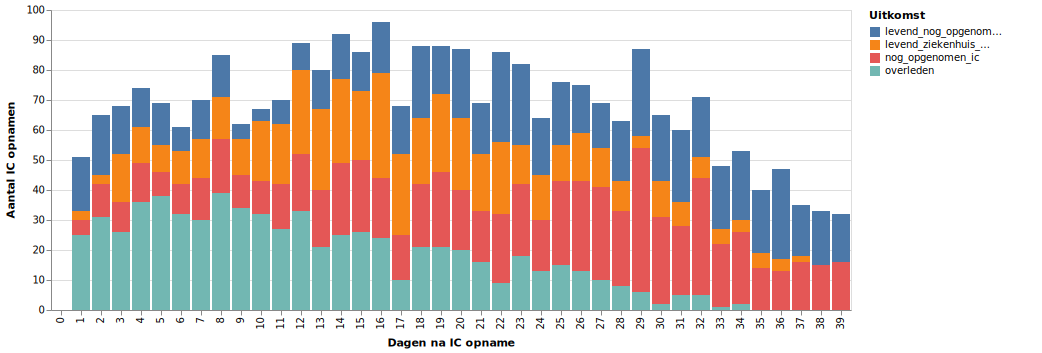

In [5]:
# Take cumulative sum
# move to long format so we can map a column to color channel later
chart_data_bar = icu_treatment_duration_df.reset_index().melt(id_vars='days')

alt.Chart(chart_data_bar).mark_bar().encode(
    x=alt.X('days:O', axis=alt.Axis(title='Dagen na IC opname')),
    y=alt.Y('value:Q', axis=alt.Axis(title='Aantal IC opnamen')),
    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
)

Same chart for general hospital population **excluding** patients which were on the ICU during their stay. Those would transition to the other diagram.

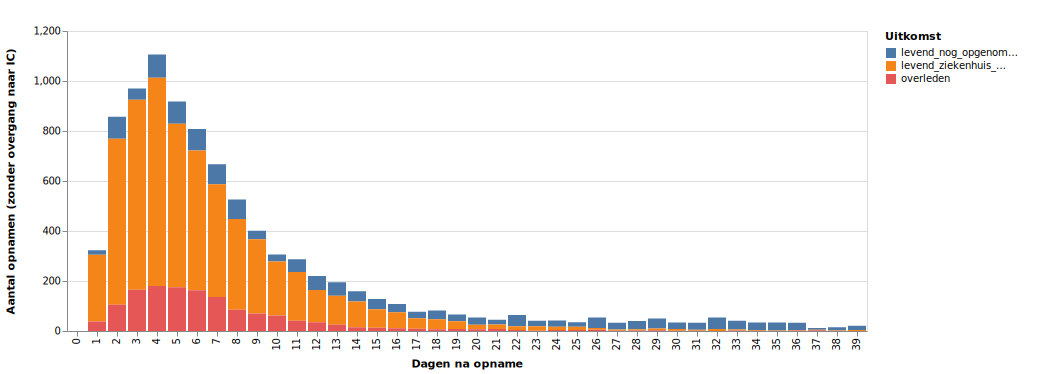

In [19]:
# Take cumulative sum
# move to long format so we can map a column to color channel later
chart_data_bar = zkh_duration_df.reset_index().melt(id_vars='days')

alt.Chart(chart_data_bar).mark_bar().encode(
    x=alt.X('days:O', axis=alt.Axis(title='Dagen na opname')),
    y=alt.Y('value:Q', axis=alt.Axis(title='Aantal opnamen (zonder overgang naar IC)')),
    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
)

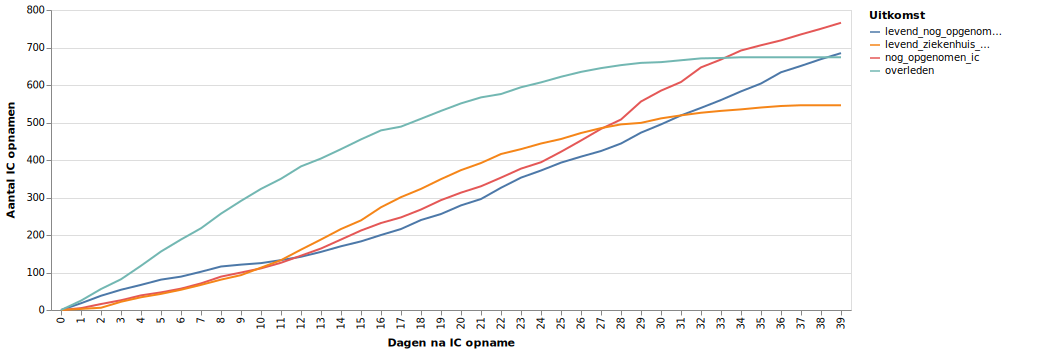

In [6]:
# Take cumulative sum
# move to long format so we can map a column to color channel later
chart_data = icu_treatment_duration_df.cumsum().reset_index().melt(id_vars='days')

alt.Chart(chart_data).mark_line().encode(
    x=alt.X('days:O', axis=alt.Axis(title='Dagen na IC opname')),
    y=alt.Y('value:Q', axis=alt.Axis(title='Aantal IC opnamen')),
    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
)

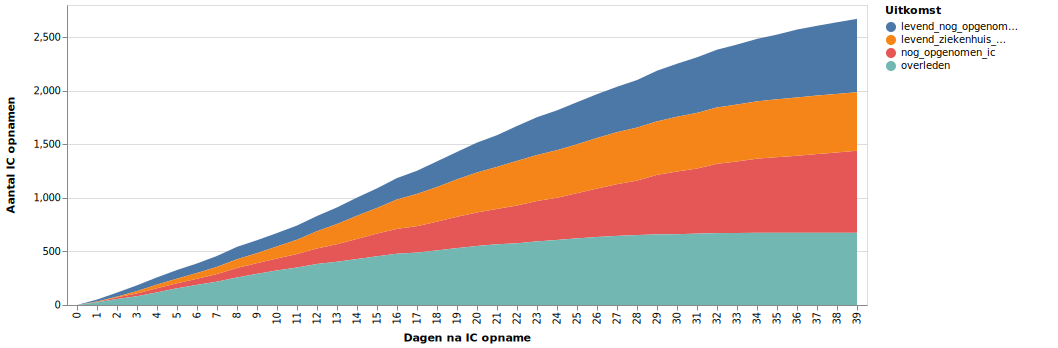

In [7]:
alt.Chart(chart_data).mark_area().encode(
    x=alt.X('days:O', axis=alt.Axis(title='Dagen na IC opname')),
    y=alt.Y('value:Q', axis=alt.Axis(title='Aantal IC opnamen')),
    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
)

Via "Patiëntkarakteristieken en uitkomsten" I found the Kaplan-Meier survival curve

https://www.stichting-nice.nl/COVID_rapport_20200420.pdf pg. 8

,levend_nog_opgenomen_ziekenhuis,levend_ziekenhuis_verlaten,overleden
days,,,
0,0.000000,0.000000,0.000000
1,0.002006,0.029756,0.004235
2,0.011813,0.103756,0.015937
3,0.016828,0.188454,0.034325
4,0.027193,0.281288,0.054385
5,0.037111,0.354174,0.073888
6,0.046696,0.416472,0.092054
7,0.055611,0.466734,0.107211
8,0.064304,0.507188,0.116683


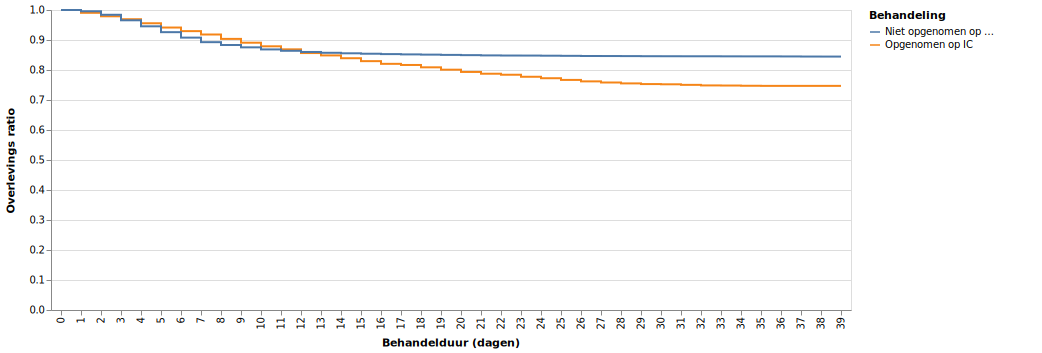

In [47]:
# Survival ratio is the cumulative number of patients deceased up to that amount of days after
# IC start divided by total number of patients.
#
icu_survival_ratio = 'Opgenomen op IC'
zkh_survival_ratio = 'Niet opgenomen op IC'

survival_df = icu_treatment_duration_df.copy()
survival_df[icu_survival_ratio] = (1-survival_df.overleden.cumsum()/survival_df.sum().sum())
survival_df = survival_df.filter([icu_survival_ratio])

zkh_survival_df = zkh_duration_df.copy()
zkh_survival_df[zkh_survival_ratio] = (1-zkh_survival_df.overleden.cumsum()/zkh_survival_df.sum().sum())
zkh_survival_df = zkh_survival_df.filter([zkh_survival_ratio])

data = survival_df.join(zkh_survival_df, how='inner')\
    .reset_index()\
    .melt(id_vars='days')

alt.Chart(data).mark_line(interpolate='step-after').encode(
    x=alt.X('days:O', axis=alt.Axis(title='Behandelduur (dagen)')),
    y=alt.Y('value:Q', axis=alt.Axis(title='Overlevings ratio')),
    color=alt.Color('variable:N', legend=alt.Legend(title='Behandeling'))
)

An attempt for something like the demographic pyramid

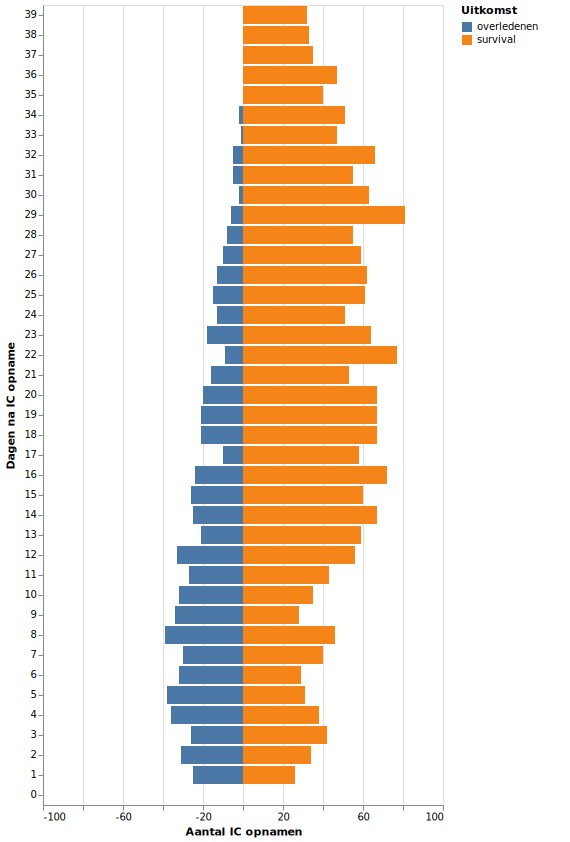

In [9]:
# Pyramid of positive and negative outcome
df = icu_treatment_duration_df.copy()
df['survival'] = df.sum(axis=1) - df.overleden
df['overledenen'] = -df.overleden

chart_data_bar = df[['survival', 'overledenen']].reset_index().melt(id_vars='days')

alt.Chart(chart_data_bar).mark_bar().encode(
    y=alt.Y('days:O', sort='descending', axis=alt.Axis(title='Dagen na IC opname')),
    x=alt.X('value:Q', axis=alt.Axis(title='Aantal IC opnamen'), scale=alt.Scale(domain=(-100, 100))),
    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
)
# treatment_duration_df['survival']
#positive.join(negative, how='outer')
# Take cumulative sum
# move to long format so we can map a column to color channel later
#chart_data_bar = treatment_duration_df.reset_index().melt(id_vars='days')
#
#alt.Chart(chart_data_bar).mark_bar().encode(
#    x=alt.X('days:O', axis=alt.Axis(title='Dagen na opname')),
#    y=alt.Y('value:Q', axis=alt.Axis(title='Aantal IC opnamen')),
#    color=alt.Color('variable:N', legend=alt.Legend(title='Uitkomst'))
#)